# Project 1 - Prediction using NN and Fuzzy Systems

Authors: André Amaral (90012) and Tomás Bessa (90200).

Computational Intelligence October 2021.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# <font color='green'><b> 1) Dataset </b></font>

In [2]:
df = pd.read_csv('ACI21-22_Proj1IoTGatewayCrashDataset.csv')
eval_df = pd.read_csv('ACI_Proj1_TestSet.csv')

In [3]:
df.head(10)

,Requests,Load,Falha
0,0.32,0.12,0
1,0.06,0.43,0
2,0.06,0.19,0
3,0.02,0.08,0
4,0.09,0.19,0
5,0.04,0.07,0
6,0.08,0.90,0
7,0.80,0.44,0
8,0.01,0.03,0
9,0.01,0.15,0


In [4]:
eval_df.head(60)

,Requests,Load,Falha
0,0.04,0.07,0
1,0.02,0.09,0
2,0.06,0.39,0
3,0.07,0.01,0
4,0.06,0.10,0
5,0.03,0.02,0
6,0.01,0.23,0
7,0.45,0.21,0
8,0.67,0.14,0
9,0.73,0.35,0


### Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Requests  1999 non-null   float64
 1   Load      1999 non-null   float64
 2   Falha     1999 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [6]:
df.describe()

,Requests,Load,Falha
count,1999.000000,1999.000000,1999.000000
mean,0.161956,0.284967,0.023012
std,0.235763,0.200008,0.149977
min,0.000000,0.000000,0.000000
25%,0.030000,0.130000,0.000000
50%,0.060000,0.260000,0.000000
75%,0.090000,0.400000,0.000000
max,0.990000,0.980000,1.000000


In [7]:
df['Falha'].value_counts()

0    1953
1      46
Name: Falha, dtype: int64

This section shows that the faillure case is less relevant in the given dataset, contrary to the normal cases. After performing the train_test_split the train set must be balanced to get an accurate model.

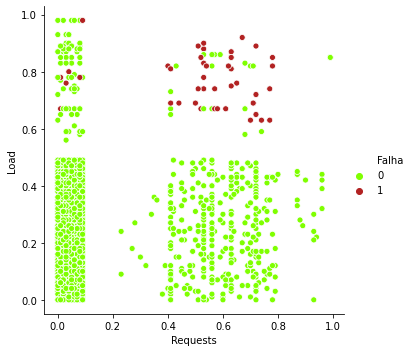

In [8]:
sns.relplot(data=df,x="Requests", y="Load", hue="Falha", palette=['chartreuse','firebrick'])

# <font color='green'><b> 2) Will it Crash or Not? </b></font>

### a) Train Test Validation Split

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Falha', axis = 1).values
Y = df['Falha'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state = 101)
X_train, X_Val, Y_train, Y_Val = train_test_split(X_train,Y_train,test_size=0.25, random_state = 101)

### b) Data Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_Val = scaler.transform(X_Val)

### c) MLP Classifier

In [11]:
from sklearn.neural_network import MLPClassifier

Crash_Model = MLPClassifier(
                                hidden_layer_sizes = (8,2),
                                activation ='tanh',
                                solver = 'adam',
                                max_iter=20000
                           )

Crash_Model.fit(X_train,Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 2), max_iter=20000)

### d) Test The Model

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
Crash_Pred = Crash_Model.predict(X_test)

In [14]:
print("Classification Report")
print(' ')
print(classification_report(Y_test,Crash_Pred, zero_division = 0))
print(" Confusion Matrix")
print(' ')
print(confusion_matrix(Y_test,Crash_Pred))
print(' ')
print(accuracy_score(Y_test,Crash_Pred))

Classification Report
 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.00      0.00      0.00        11

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.96      0.98      0.97       500

 Confusion Matrix
 
[[489   0]
 [ 11   0]]
 
0.978


As we can see, due to the unbalanced dataset, the MLP cannot make accurate classifications in the test set.

### e) Evaluate The Model

In [15]:
Crash_Eval = Crash_Model.predict(X_Val)

In [16]:
print("Classification Report")
print(' ')
print(classification_report(Y_Val,Crash_Eval, zero_division = 0))
print("Confusion Matrix")
print(' ')
print(confusion_matrix(Y_Val,Crash_Eval))
print(' ')
print(accuracy_score(Y_Val,Crash_Eval))

Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       360
           1       0.00      0.00      0.00        15

    accuracy                           0.96       375
   macro avg       0.48      0.50      0.49       375
weighted avg       0.92      0.96      0.94       375

Confusion Matrix
 
[[360   0]
 [ 15   0]]
 
0.96


Despite the good accuracy, which is not the best metric, the confusion matrix shows an underlying problem regarding the model in data classification, especially in crash classifications. In addition, precison is failling since its value is obtained by mixing the two columns. Therefore, in an imbalanced dataset, it will not work properly.

# <font color='green'><b> 3) Expert 1 in Data Analysis </b></font>

<b> 1 - </b> "A quick look at the data shows that this is a very unbalanced problem, with very few positive instances. So, you should try to balance your training set before any attempt to learn from the data” (Note: DON’T balance the validation or test sets, only the training set)."

<b> Idea: </b> Apply SMOOT strategy to overcome the unbalanced problem. In order to take innto account the sequentiality of the data we will use the parameter of k_neighbours of 5.

<b> Method of choice: SMOTE </b>  In order to determine which was the best method of balancing data, several tests were run. The chosen methods included SMOTE, SMOTEN, ADAYSN, BorderLine SMOTE and K-Means SMOTE. Each of them performed well and was efficient in balancing the dataset. Among them, the one that performed the best was the SMOTE method, having the highest accuracy score (0.99), f1-score(0-1.00, 1-0.75) and recall(0-1.00, 1-1.00) Therefore, using comparative analysis, it is possible to conclude that the method that performs the best is the SMOTE method, hence, the method that is applied to balance the given dataset

<b> 2 - </b> “Some quick basic data analysis was performed and it was noticed that all crashes happened during a High processor load, even though this is not a sufficient condition for a crash to happen. However, it seems that the number of requests itself is not necessarily related to the crash. Therefore, what causes the crash must be related with an event that happened prior to it. This is definitely a system where order is important.” (Note: Maintain the order of data in the training, validation and data sets)

<b> Idea: </b> Apply "Shuffle = False" when doing the train test split to mantain the data order.

<b> 3 - </b> “So, my advice would be to try to learn something using Processor_Load as one of the inputs, and use several previous instances of Number_of_Requests as additional inputs” (Example: try using the following features as the inputs for the NN: Processor_Loadt; Number_of_Requestst-1; Number_of_Requestst-2)

<b> Idea: </b> Create a new dataframe with a concatenation of the old one "df" and 3 new columns, drop the old ones to train the new MLP. Using pandas shift function, the previous data ("Number of Requests") will be obtained

<b> Our Point of View:</b> Analyzing all suggestions we see that the first and second one will be the last two to be implemented since it will only balance the training data but we first need to make data curation in all data before split it.

The correct implement order is: 3, 2, 1

## Implementation of the Expert 1 Suggestions.

#### Point 3

In [17]:
df_expert1 = df.copy()

Implement two delays of the Number of Request, as it is suggested by the expert 1.

In [18]:
df_expert1['Number_of_Requests_1'] = df_expert1['Requests'].shift(1)
df_expert1['Number_of_Requests_2'] = df_expert1['Requests'].shift(2)

df_expert1 = df_expert1.drop('Requests', axis = 1)

In [19]:
df_expert1.head()

,Load,Falha,Number_of_Requests_1,Number_of_Requests_2
0,0.12,0,NaN,NaN
1,0.43,0,0.32,NaN
2,0.19,0,0.06,0.32
3,0.08,0,0.06,0.06
4,0.19,0,0.02,0.06


A close look upon the dataframe, we can see it is working as the expert meant to, so now it is only necessary to drop the NaN values to avoid mistakes in model training.

In [20]:
df_expert1 = df_expert1.dropna()

Here ends the third tip given by the expert 1, let's continue.

#### Point 2

Performing the train, test and validation split, it is necessary to ensure that the dataset is not shuffled, so as to mantain the order.

In [21]:
X1 = df_expert1.drop('Falha', axis = 1).values
Y1 = df_expert1['Falha'].values

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.15, random_state = 1, shuffle = False)
X1_train, X1_Val, Y1_train, Y1_Val = train_test_split(X1_train,Y1_train,test_size=0.15, random_state = 1, shuffle = False)

#### Point 1

Since the data is now split into Training, Validation and Test we are now able to balance the TRAINING set and only that set. As it was stated earlier, the used technique will be SMOTE. It will be used to generate synthetic data of the class represented below.

In [22]:
from imblearn.over_sampling import SMOTE

X1_train_balanced, Y1_train_balanced = SMOTE().fit_resample(X1_train, Y1_train)

In [23]:
Y1_train_balanced = pd.DataFrame(Y1_train_balanced, columns=['Falhas'])
X1_train_balanced = pd.DataFrame(X1_train_balanced, columns=['Load','NR1', 'NR2'])
df_plot = pd.concat([Y1_train_balanced, X1_train_balanced], axis = 1)
Y1_train = pd.DataFrame(Y1_train, columns=['Falhas'])

In [24]:
Y1_train['Falhas'].value_counts()

0    1411
1      31
Name: Falhas, dtype: int64

In [25]:
Y1_train_balanced['Falhas'].value_counts()

1    1411
0    1411
Name: Falhas, dtype: int64

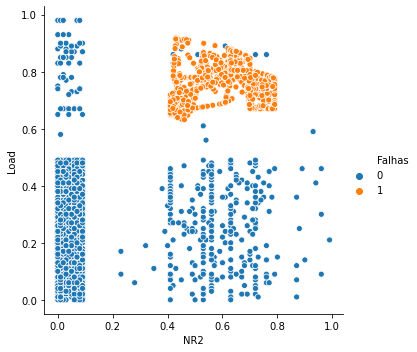

In [26]:
sns.relplot(data=df_plot,x="NR2", y="Load", hue="Falhas")

As it can be seen, the data now has the same amount of faillures and normal classifications. However, in the load interval of 0.6 to 1, in the dataset, we could notice the presence of faillures. Now, with the balanced training set, it is possible to observe that those faillures are absent in this set, which means they are present in both the test and validation set. This will lead to a few misclassifications, since the data has never been seen by the model itself.

## Implementation Of The Model (MLP)

First, we need to scale the data.

In [27]:
X1_train_balanced = scaler.fit_transform(X1_train_balanced)
X1_test = scaler.transform(X1_test)
X1_Val = scaler.transform(X1_Val)

Second, we need to instanciate our model.

In [28]:
Crash_Model_Expert1 = MLPClassifier(hidden_layer_sizes = (8,2), activation ='relu', solver = 'adam', max_iter=2000,
                                    random_state = 1)
Crash_Model_Expert1.fit(X1_train_balanced,np.ravel(Y1_train_balanced))

MLPClassifier(hidden_layer_sizes=(8, 2), max_iter=2000, random_state=1)

Third, make predictions in order to adjust the model parameters.

In [29]:
Crash_Expert1_Pred = Crash_Model_Expert1.predict(X1_test)

print(classification_report(Y1_test,Crash_Expert1_Pred))
print(" ")
print(confusion_matrix(Y1_test,Crash_Expert1_Pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.58      1.00      0.74         7

    accuracy                           0.98       300
   macro avg       0.79      0.99      0.86       300
weighted avg       0.99      0.98      0.99       300

 
[[288   5]
 [  0   7]]


Finally, we will validate our model.

In [30]:
Crash_Expert1_Val = Crash_Model_Expert1.predict(X1_Val)

print(classification_report(Y1_Val,Crash_Expert1_Val))
print(" ")
print(confusion_matrix(Y1_Val,Crash_Expert1_Val))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       247
           1       0.73      1.00      0.84         8

    accuracy                           0.99       255
   macro avg       0.86      0.99      0.92       255
weighted avg       0.99      0.99      0.99       255

 
[[244   3]
 [  0   8]]


As it is observable, Expert 1 tips made the model more accurate and unable crash! Although it still has some issues when classifying normal cases.
One cause for this behaviour might be related to the sequenciality of data. When not performing shuffle, it can prevent the model from being trained with all possible behaviours.

# <font color='green'><b> 4) Expert 2 in Data Analysis </b></font>


<b> 1 - </b> “The problem with these Gateways, is that they were not originally developed to perform heavy computations for long periods of time. However, using them exclusively to process simple routing requests is a waste of processing power. So it makes sense to take advantage of them in some other ways, and it’s natural to assign them for some edge processing tasks. 

That being said, when some jobs are carelessly assigned to the Gateway, the system can overload which may result in subsequent crashes. Usually, this is caused by jobs that hog some of the system’s resources for too long. When that happens, the Gateway often starts refusing regular requests for no apparent reason. Such requests are usually repeated until they are accepted. After a while, the processor starts overworking, heat builds up, and the system crashes. 

In order to detect when this is about to happen, we looked for an abnormal amount of requests in the period before the processor load gets noticeably high.”

<b> Idea: </b> Make the mean of the 1h20 request of a consequent load. And drop the other features and train the model.

#### Point 1

In [31]:
df_expert1.head()
df_expert2 = df_expert1.copy()

Let's insert the previous requests in the dataframe.

In [32]:
df_expert2['Number_of_Requests_3'] = df['Requests'].shift(3)
df_expert2['Number_of_Requests_4'] = df['Requests'].shift(4)

df_expert2 = df_expert2.dropna()

Now let's compute the new feature, which computes the mean of the previous four requests for a given load processor.

In [33]:
df_expert2['Sum_Previous_Requests'] = (df_expert2['Number_of_Requests_1'] + df_expert2['Number_of_Requests_2'] + df_expert2['Number_of_Requests_3'] + df_expert2['Number_of_Requests_4'])/4

Let's now search for when a Failure occurs, to see the mean of the previous requests.

In [34]:
df_expert2[df_expert2['Falha']==1]['Sum_Previous_Requests'].mean()

0.5672826086956522

Finally, it is time to analyze what happens in normal conditions regarding the mean of previous requests.

In [35]:
df_expert2[df_expert2['Falha']==0]['Sum_Previous_Requests'].mean()

0.15254617752693736

In [36]:
df_expert2 = df_expert2.drop([
                               'Number_of_Requests_1',
                               'Number_of_Requests_2',
                               'Number_of_Requests_3',
                               'Number_of_Requests_4'],
                                axis = 1
                             )

## Implementation Of The Model (MLP)

In [37]:
X2 = df_expert2.drop('Falha', axis = 1)
Y2 = df_expert2['Falha']

First, train, test and validation split (taking the order in consideration).

In [38]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.15, random_state = 1, shuffle = False)
X2_train, X2_Val, Y2_train, Y2_Val = train_test_split(X2_train,Y2_train,test_size=0.15, random_state = 1, shuffle = False)

Second, balance the training data.

In [39]:
X2_train_balanced, Y2_train_balanced = SMOTE().fit_resample(X2_train, Y2_train)

Third, scaling the data.

In [40]:
X2_train_balanced = scaler.fit_transform(X2_train_balanced)
X2_test = scaler.transform(X2_test)
X2_Val = scaler.transform(X2_Val)

Finally, the model can be implemented.

In [41]:
Crash_Model_Expert2 = MLPClassifier(
                                        hidden_layer_sizes = (8,2),
                                        activation ='relu',
                                        solver = 'adam',
                                        max_iter=20000,
                                        random_state = 1
                                        
                                    )

Crash_Model_Expert2.fit(X2_train_balanced,np.ravel(Y2_train_balanced))

MLPClassifier(hidden_layer_sizes=(8, 2), max_iter=20000, random_state=1)

Now, it is possible to make predictions, so as to further adjust the model parameters.

In [42]:
Crash_Expert2_Pred = Crash_Model_Expert2.predict(X2_test)

In [43]:
print(classification_report(Y2_test,Crash_Expert2_Pred))
print(" ")
print(confusion_matrix(Y2_test,Crash_Expert2_Pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       293
           1       0.64      1.00      0.78         7

    accuracy                           0.99       300
   macro avg       0.82      0.99      0.89       300
weighted avg       0.99      0.99      0.99       300

 
[[289   4]
 [  0   7]]


Finally, the model is ready to be validated.

In [44]:
Crash_Expert2_Val = Crash_Model_Expert2.predict(X2_Val)

In [45]:
print(classification_report(Y2_Val,Crash_Expert2_Val))
print(" ")
print(confusion_matrix(Y2_Val,Crash_Expert2_Val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       0.89      1.00      0.94         8

    accuracy                           1.00       255
   macro avg       0.94      1.00      0.97       255
weighted avg       1.00      1.00      1.00       255

 
[[246   1]
 [  0   8]]


Upon validating our model we see with the complement of the expert 2 it is working better. It considerably reduced the misclassifications.

## <font color='Blue'><b> Evaluation with the provided DataSet </b></font>

In [46]:
X_final = eval_df.drop('Falha', axis = 1)
Y_final = eval_df['Falha']

X_final = scaler.transform(X_final)
Final_Predictions = Crash_Model_Expert2.predict(X_final)

print(classification_report(Y_final,Final_Predictions))
print(" ")
print(confusion_matrix(Y_final,Final_Predictions))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       192
           1       0.32      0.75      0.44         8

    accuracy                           0.93       200
   macro avg       0.65      0.84      0.70       200
weighted avg       0.96      0.93      0.94       200

 
[[179  13]
 [  2   6]]


## <font color='Blue'><b> ----------------------------------------------------------------------- </b></font>

# <font color='green'><b> 5) Fuzzy Rule Based Expert System </b></font>


In [47]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Upon analyising the final dataframe, it is noticeable that it only contains 2 input features ("Processor load" and "Sum of requests") and one output ("Falhas). Currently, in terms of fuzzy language, there are 2 Antecedents and 1 Consequent. Firstly, the antecedents and consequents will be computed.

In [48]:
# New Antecedent/Consequent
Proc_Load = ctrl.Antecedent(np.arange(0, 0.98, 0.01), 'Proc_Load')
Sum_Requests = ctrl.Antecedent(np.arange(0, 0.7, 0.001), 'Sum_Requests')
Falhas = ctrl.Consequent(np.arange(-0.1, 1.1, 0.00001), 'Falhas')

# Membership Functions
Falhas['Normal'] = fuzz.trimf(Falhas.universe, [-0.00001, 0, 0.00001])
Falhas['Fail'] = fuzz.trimf(Falhas.universe, [0.99999, 1, 1])

Proc_Load['Slow'] = fuzz.trimf(Proc_Load.universe, [0, 0, 0.5])
Proc_Load['Medium'] = fuzz.trimf(Proc_Load.universe, [0.4, 0.5, 0.6])
Proc_Load['Fast'] = fuzz.trimf(Proc_Load.universe, [0.5, 0.98, 0.98])

Sum_Requests['Low'] = fuzz.trimf(Sum_Requests.universe, [0, 0, 0.3])
Sum_Requests['Medium'] = fuzz.trimf(Sum_Requests.universe, [0.25, 0.35, 0.45])
Sum_Requests['Higher'] = fuzz.trimf(Sum_Requests.universe, [0.4, 0.7, 0.7])

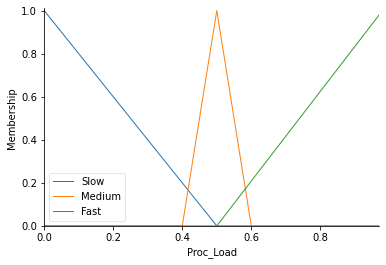

In [49]:
Proc_Load.view()

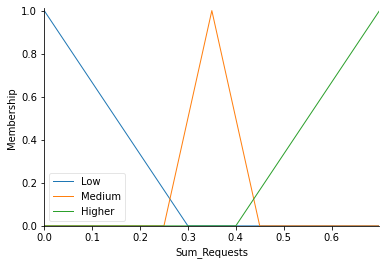

In [50]:
Sum_Requests.view()

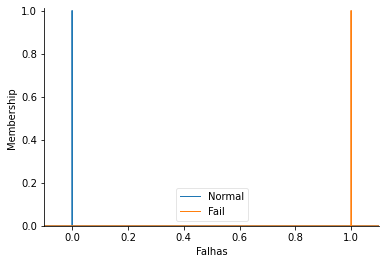

In [51]:
Falhas.view()

After a detailed data analysis, it is perceivable that when both the processor load is above 0.5 and the sum of requests is superior to 2, a faillure takes place. Taking that into consideration, a table was built according to what was reasonable for this problem. Futher, this table helped us to form the following rules:

1) If Processor Load is <b> Slow </b> and Request Sum is <b>Low</b>, then Falha is <b>Normal</b>.

2) If Processor Load is <b> Slow </b> and Request Sum is <b>Medium</b>, then Falha is <b>Normal</b>.

3) If Processor Load is <b> Slow </b> and Request Sum is <b>Higher</b>, then Falha is <b>Normal</b>.

4) If Processor Load is <b> Medium </b> and Request Sum is <b>Low</b>, then Falha is <b>Normal</b>.

5) If Processor Load is <b> Medium </b> and Request Sum is <b>Medium</b>, then Falha is <b>Normal</b>.

6) If Processor Load is <b> Medium </b> and Request Sum is <b>Higher</b>, then Falha is <b>Normal</b>.

7) If Processor Load is <b> Fast </b> and Request Sum is <b>Low</b>, then Falha is <b>Normal</b>.

8) If Processor Load is <b> Fast </b> and Request Sum is <b>Medium</b>, then Falha is <b>Normal</b>.

9) If Processor Load is <b> Fast </b> and Request Sum is <b>Higher</b>, then Falha is <b>Fail</b>.

In [52]:
rule1 = ctrl.Rule(Proc_Load['Slow'] & Sum_Requests['Low'], Falhas['Normal'])
rule2 = ctrl.Rule(Proc_Load['Slow'] & Sum_Requests['Medium'], Falhas['Normal'])
rule3 = ctrl.Rule(Proc_Load['Slow'] & Sum_Requests['Higher'], Falhas['Normal'])
rule4 = ctrl.Rule(Proc_Load['Medium'] & Sum_Requests['Low'], Falhas['Normal'])
rule5 = ctrl.Rule(Proc_Load['Medium'] & Sum_Requests['Medium'], Falhas['Normal'])
rule6 = ctrl.Rule(Proc_Load['Medium'] & Sum_Requests['Higher'], Falhas['Normal'])
rule7 = ctrl.Rule(Proc_Load['Fast'] & Sum_Requests['Low'], Falhas['Normal'])
rule8 = ctrl.Rule(Proc_Load['Fast'] & Sum_Requests['Medium'], Falhas['Normal'])
rule9 = ctrl.Rule(Proc_Load['Fast'] & Sum_Requests['Higher'], Falhas['Fail'])

Now, it is necessary to proceed to the aggregation of the rules.

In [53]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
Fuzzy_System = ctrl.ControlSystemSimulation(tipping_ctrl)

Here we can see some testing values.

In [54]:
Fuzzy_System.input['Proc_Load'] = 0.07
Fuzzy_System.input['Sum_Requests'] = 0.0575

# Crunch the numbers
Fuzzy_System.compute()

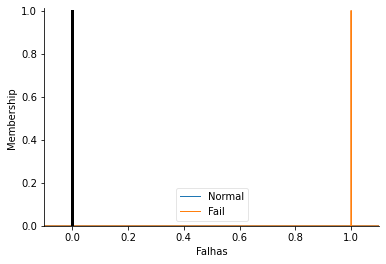

In [55]:
Falhas.view(sim=Fuzzy_System)

# <font color='green'><b> Extra) Fuzzy Rule Based Expert System Evaluation </b></font>

### <font color='red'><b> Warning: Since we have 2 inputs with around 3200 rows joining this with the fact we are evaluting a fuzzy system the code is time consuming, so only run this in case of realy necessity. That is why we implemented this feature in another jupiter notebook file. </b></font>

Go the the notebook called <b>"Fuzzy_System_Evaluation"</b> to evaluate this method.

# <font color='green'><b> 6) Conclusions </b></font>

Upon completing the assignment at hand, several conclusions were reached.

First of all, it is clear that using raw data in a neural network model is not a good idea since the model will crash, not providing the correct predictions. It is also worth mentioning that the model which crashed with raw data has a good accuracy, so, it is obvious that accuracy itself, without any further measurements, is not a good evaluation parameter. Furthermore, when predicting crashes earlier on, the model got a f-1 score of 0 when predicting crashes. It also got the same score (0), in both precision and recall, which means it is unable to predict crashes using the trainning set at hand. The macro average is also quite low, being about 0.5, which further confirms the lack of quality associated with this type of model.

When dealing with time series problems, it is important to pay atention, since the previous measurements are of relative importance to the future ones. So, it is of great importance to keep the data with its original sequential order, and that is one aspect to have in mind when spliting any given data. Balancing the minority class also needs to be done taking into account that it is not meant to repeat a line that has faillures, however, it is desirable to reproduce the antecedent behaviour and consequent faillure, since they are related.

The suggestion provided by the first Expert improves the model substantially. The data was unbalanced at first but, upon applying the SMOTE method, the problem was greatly improved. The model, which was a result of the application of the suggestions provided by Expert 1, performed very well, having a very high accuracy score, f-1 score, and recall. All implemented suggestions made the model more accurate and no longer able to crash, though it still has some problems when classifying data as "Normal". One possible cause that was earlier dicussed might be the data order. Since the shuffle method is not performed, the model is maybe being prevented from being trained using all possible combinations of data, leading to a few misclassifications.

The Expert 2 made the model training available with less features, by compiling the already existent ones into a sole feature. In doing that, it was possible to identify a specific pattern in the data. For instance, when the normalized request mean was above 2 and the processor load was above 0.5, there was a detection of faillure. This pattern became the origin of the idea to apply a Fuzzy Based Rule System.

When applying the Fuzzy System, we realized that we were facing a Sugeno Fuzzy Inference Systems where the consequents are Fuzzy Sets and the antecedents are Crisp sets.

Comparing the Neural Network approach with the Fuzzy one:

1) The Neural network approach failed in classifying about one or two elements.
    
2) The Fuzzy Systems approach, when the processor load is between 0.5 and 0.6 and the Sum of requests surpasses 2, may not succeed in detecting a faillure, which may not necessarily translate in bad behaviour regarding the model, because faillure detection is associated with sensitivity

3) About the evaluation method implemented to the fuzzy system it shows some errors in classification due to the "gray area" where for example the Medium and Higher sobrepose each other. Possible with an exaustive try error or adjust of the rules a better result could be achieved.

4) An future idea that could be implemented to obtain the ideal membership functions for our dataset is to use a Neural-Fuzzy Network such as Adaptive Neural Inference System, the so called ANFIS. This neural network would pick our training data and train our fuzzy system returning the best approach for the membership functions.